## Data Analysis: Predicting Level of Education Based on Income and Age.

**Introduction:**

It is often debated what the determining factors are to one’s future income. One may suggest that the level of education may play a significant role. In our project, we will use classification methods to predict the education level of a person based on their income. The dataset we chose to use is from a marketing campaign which contains customers for a company. This data set was chosen as it is a good reflection of a large, randomly sampled group of individuals over a broad geographical area, thus allowing us to be more confident in our prediction analysis. Our main project question we will answer is: How does an individual's income and age affect their level of education?


**Preliminary exploratory data analysis:**

In the current dataframe, every row is a single observation, every column is a single variable, and each value is a single cell, indicating that the data is already tidy. In the wrangling process, we decided to filter the ‘Education’ column so that we can strictly focus on people whose highest level of education is either a high school diploma or a bachelor’s degree. Since the data contains a lot more people with a bachelor’s degree than a high school diploma, we also only selected the first 54 observations for people with bachelor’s degrees (since there are only 54 observations for people with just a high school diploma).


In [2]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
marketing_data <- read_delim("/home/jovyan/toy_ds_project/marketing_campaign.csv") |>
    mutate(Education = as_factor(Education))
marketing_data    

Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0
965,1971,Graduation,Divorced,55635,0,1,13-11-2012,34,235,⋯,6,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454,1,0,08-05-2013,32,76,⋯,8,0,0,0,0,0,0,3,11,0
4855,1974,PhD,Together,30351,1,0,06-06-2013,19,14,⋯,9,0,0,0,0,0,0,3,11,1


**Tidying the Data:**

In [4]:
# selects yob, education, and income columns
marketing_data_tidy <- marketing_data |>
    select(Year_Birth, Education, Income) 

# creates dataframe for people with only a basic degree
marketing_basic_ed <- marketing_data_tidy |> 
  filter(Education == "Basic")

# counts number of people with a basic degree
marketing_basic_ed_count <- summarize(marketing_basic_ed, n())
count <- pull(marketing_basic_ed_count, 1)

# creates dataframe for people with a bachelors degree
# (number of rows is equal to number of rows in marketing_basic_ed)
marketing_grad_ed <- marketing_data_tidy |> 
  filter(Education == "Graduation") |>
  head(count)

# rbind() stacks marketing__ed and marketing_grad_ed
marketing_data <- rbind(marketing_basic_ed, marketing_grad_ed)
marketing_data

# filters out all the observations with an NA cell
marketing_data <- marketing_data |>
  filter(!is.na(Year_Birth)) |>
  filter(!is.na(Education)) |>
  filter(!is.na(Income)) 

# drops the "Master", "PhD", and "2n Cycle" categories from Education
marketing_data$Education <- droplevels(marketing_data$Education)


Year_Birth,Education,Income
<dbl>,<fct>,<dbl>
1976,Basic,7500
1979,Basic,24594
1976,Basic,9548
1961,Basic,28249
1978,Basic,24882
1981,Basic,24480
1973,Basic,27190
1990,Basic,24279
1975,Basic,30801


**Summarizing The Data:**

In [5]:
# sets seed
set.seed(1)

# splits data into training and test set
marketing_data_split <- initial_split(marketing_data, prop = 0.75, strata = Education)
marketing_data_train <- training(marketing_data_split)
marketing_data_test <- testing(marketing_data_split) 

# summarizes training data
marketing_data_summarized <- marketing_data_train |>
    group_by(Education) |>
    summarize(Mean_Income = mean(Income, na.rm = TRUE))
marketing_data_summarized

Education,Mean_Income
<fct>,<dbl>
Graduation,50162.53
Basic,20534.25


**Visualizing the Data:**

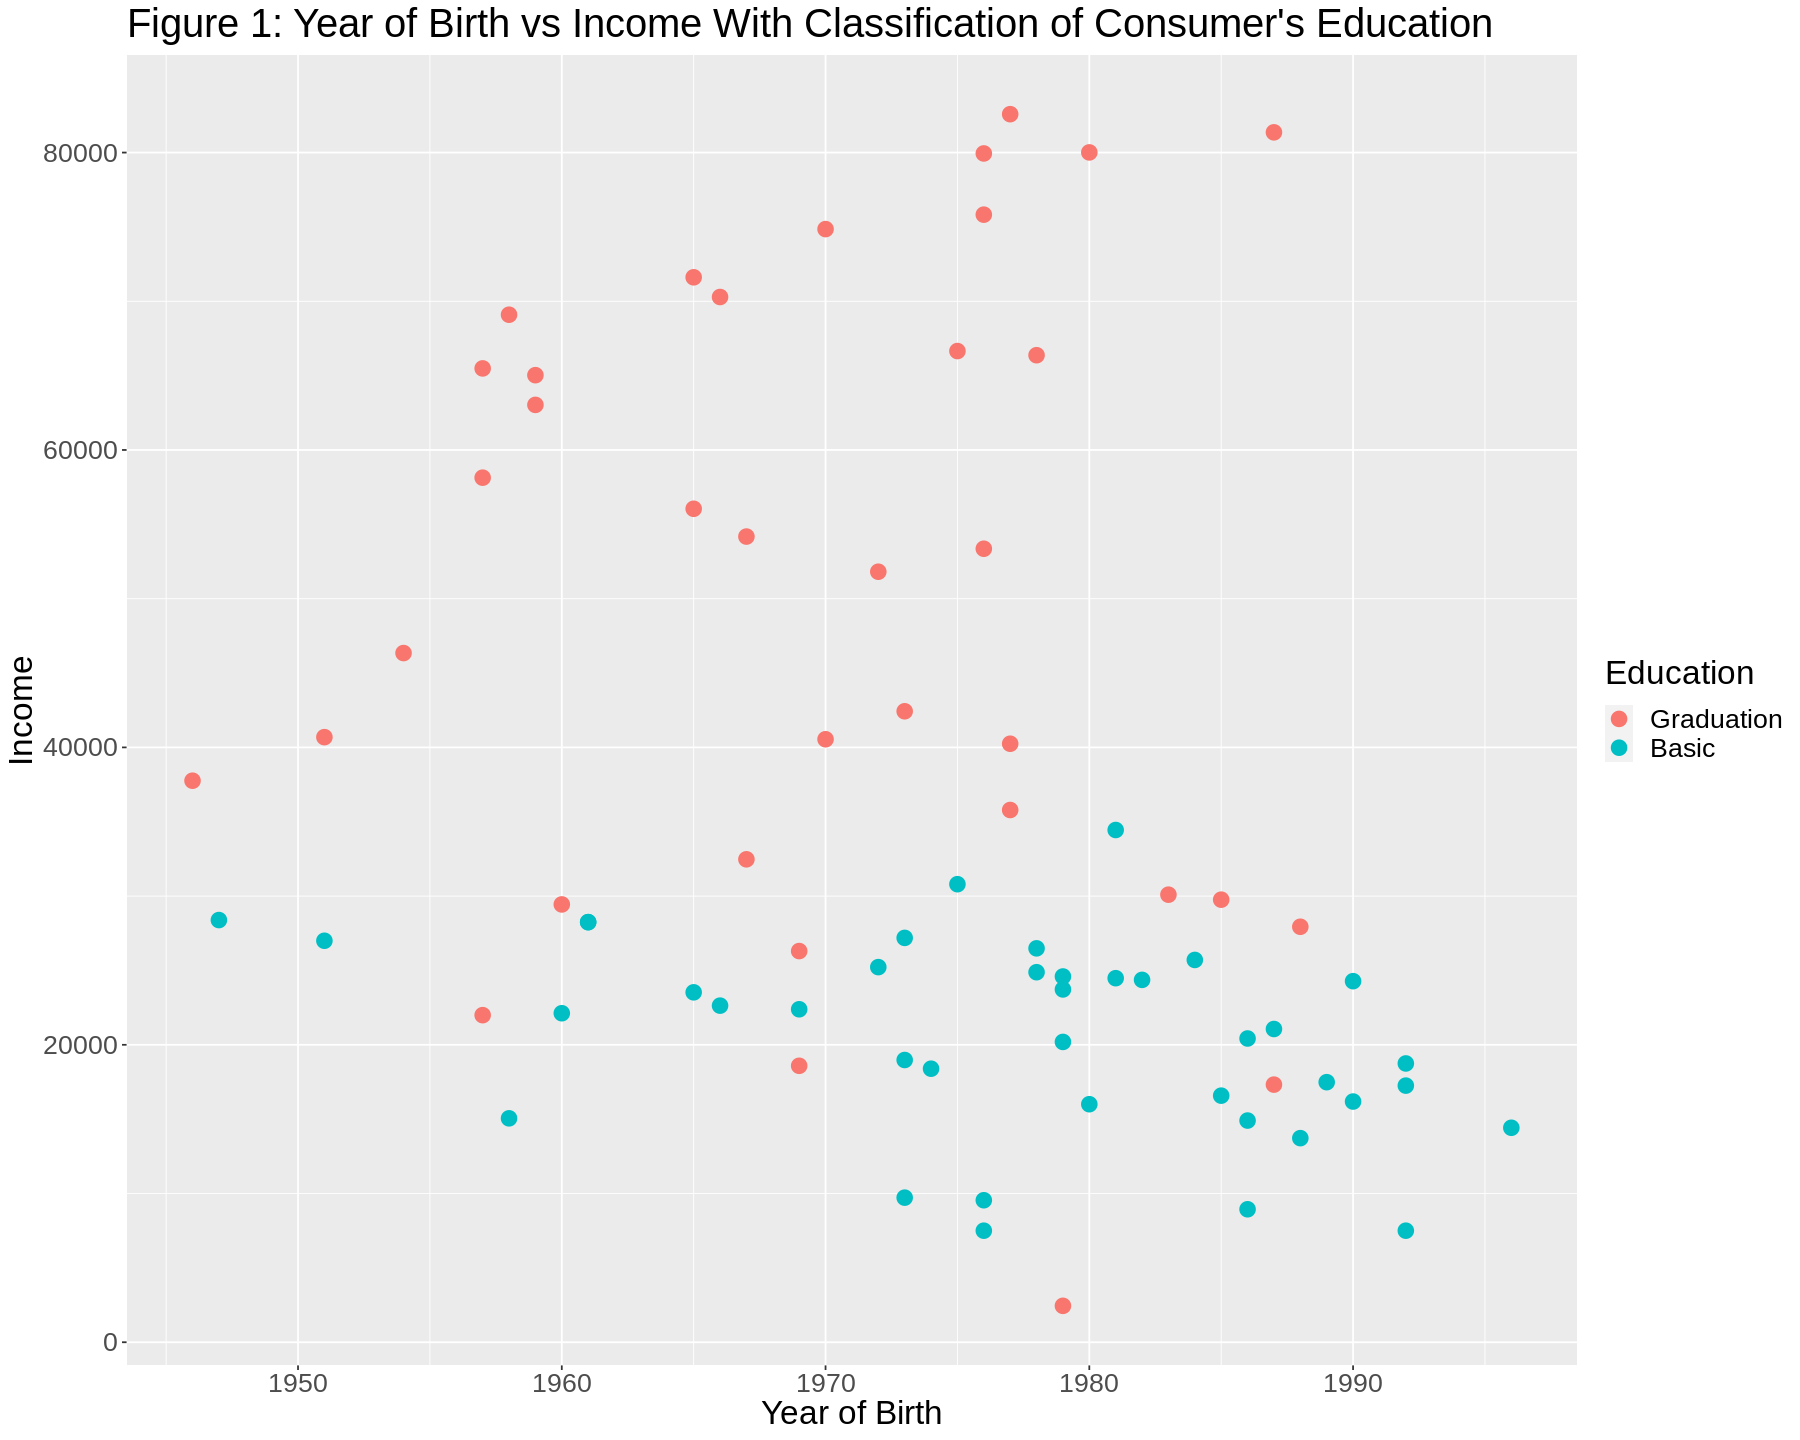

In [6]:
# visualizes training data using scatterplot
options(repr.plot.width = 15, repr.plot.height = 12)

marketing_plot <- marketing_data_train |> ggplot(aes(x = Year_Birth, y = Income, color = Education)) +
    geom_point(size = 4) +
    labs(x = "Year of Birth", y = "Income") +
    ggtitle("Figure 1: Year of Birth vs Income With Classification of Consumer's Education") +
    theme(text = element_text(size = 20))
marketing_plot

**Performing 5-Fold Cross Validation and Plotting a Neighbors vs. Average Accuracy Plot:**


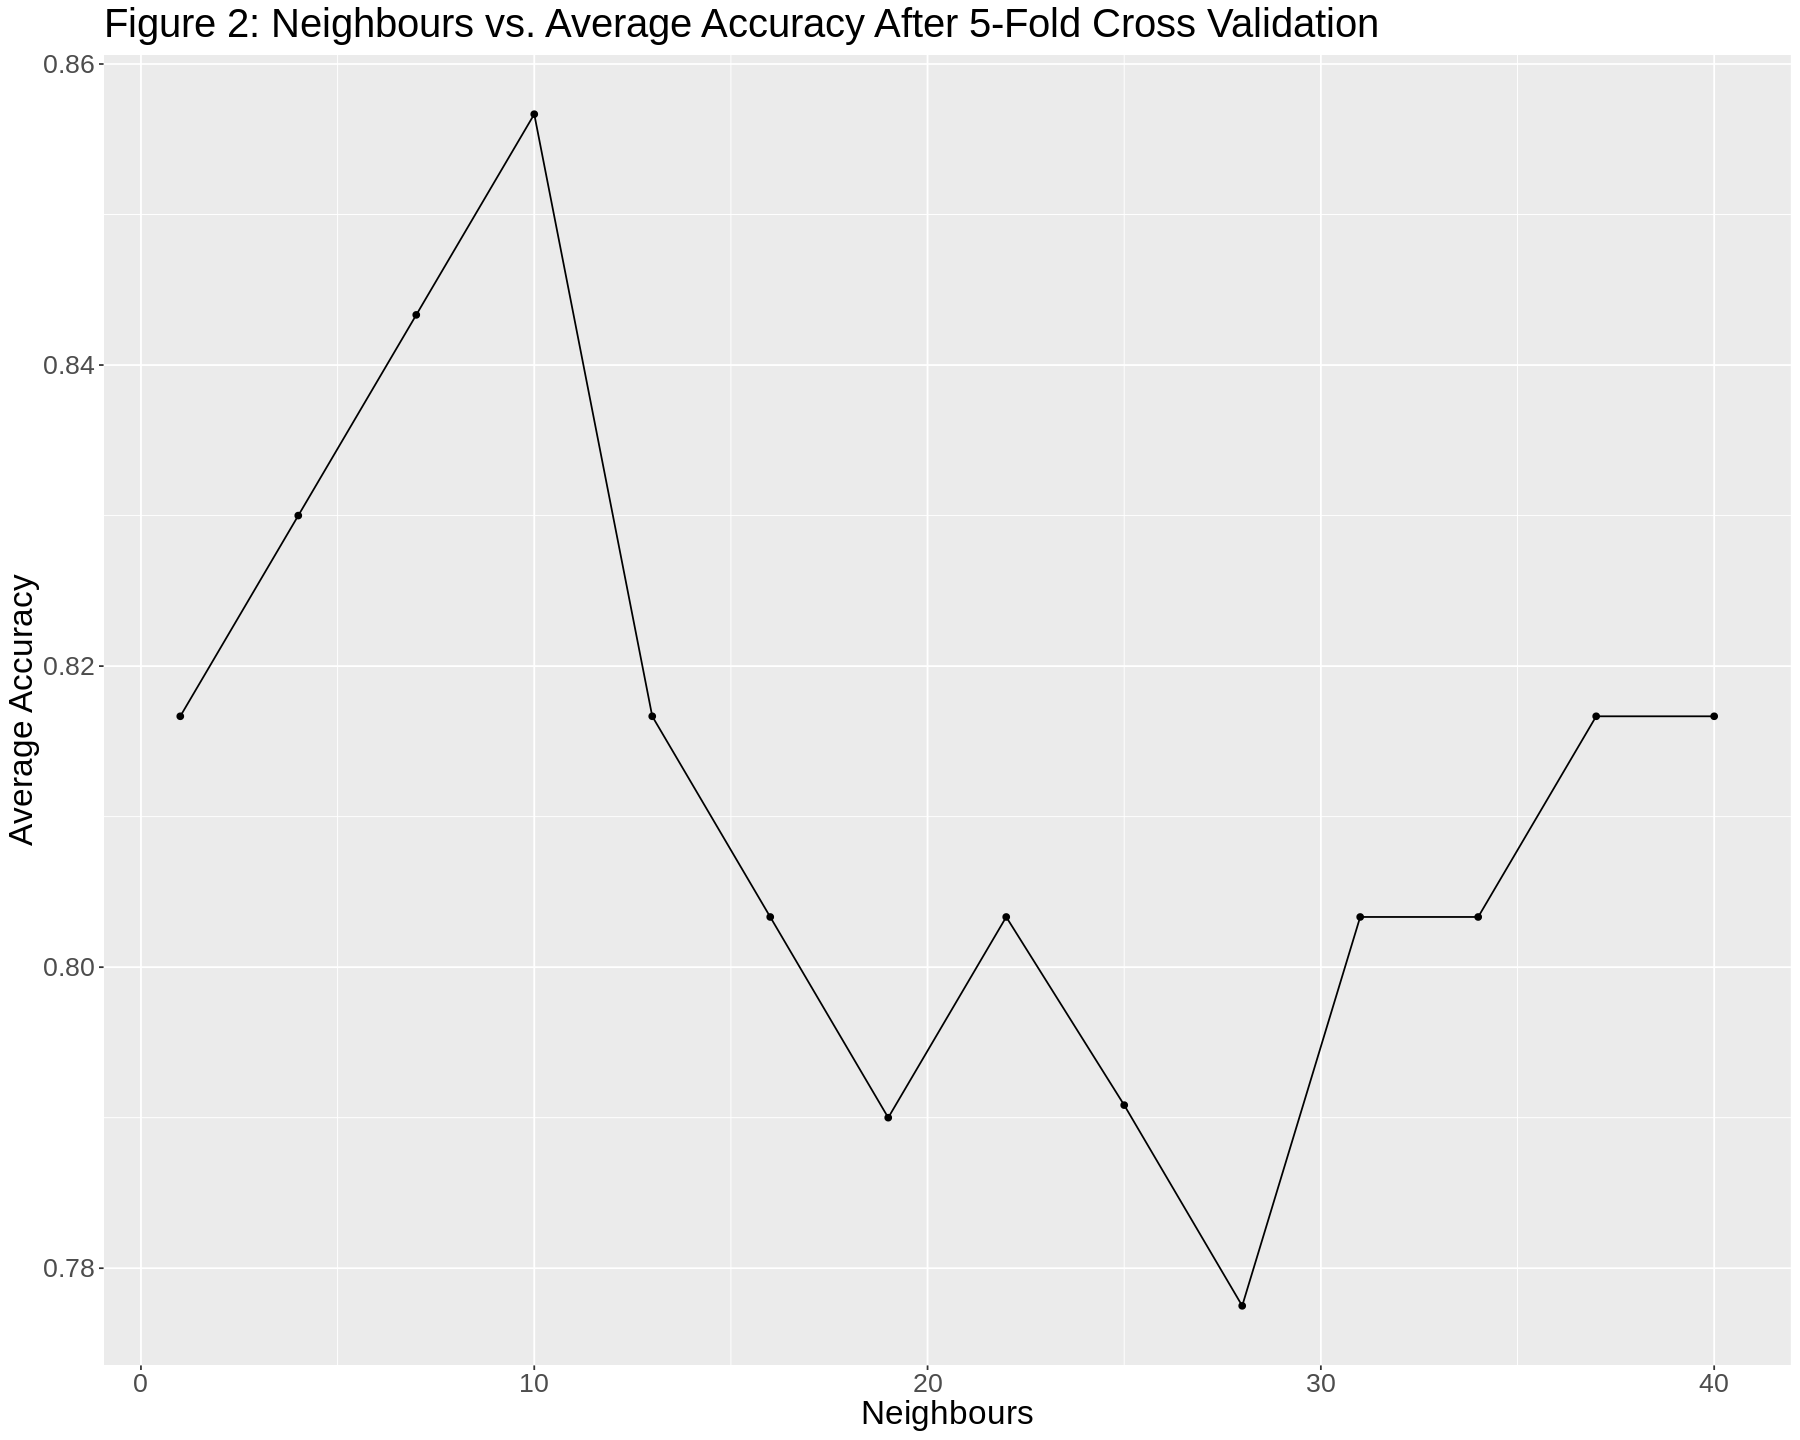

In [7]:
# sets the seed
set.seed(1)

# specify number of folds
marketing_vfold <- vfold_cv(data = marketing_data_train, v = 5, strata = Education)

# specify model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# build recipe
marketing_recipe <- recipe(Education ~ Income + Year_Birth, data = marketing_data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# create a column of K values
k_vals <- tibble(neighbors = seq(from = 1, to = 40, by = 3))

# compute the best K
accuracies <- workflow() |>
  add_recipe(marketing_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = marketing_vfold, grid = k_vals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

# observe neighbors vs accuracy plot
accuracies_plot <- accuracies |>
  ggplot(aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbours", y = "Average Accuracy") +
  ggtitle("Figure 2: Neighbours vs. Average Accuracy After 5-Fold Cross Validation") +
  theme(text = element_text(size = 20))
accuracies_plot

**Choosing the Best K:**

In [8]:
# pulls the best k
best_k <- accuracies |> 
  filter(mean == max(mean)) |>
  pull(neighbors)
best_k

[1] 10

**Fitting a New Model With The Best K:**

In [9]:
# specify new model with best K value
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")


# fit knn model with best specs
marketing_fit <- workflow() |>
  add_recipe(marketing_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = marketing_data_train)

**Evaluating the Accuracy of Our Model:**

In [10]:
# get predictions on test data
predictions <- predict(marketing_fit, marketing_data_test) |>
  bind_cols(marketing_data_test)

# evaluate accuracy of classifier using test data
accuracy <- predictions |>
  metrics(truth = Education, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  pull(.estimate)
accuracy

[1] 0.8148148

**Methods:**

The columns in the data set “Income” and "Year_Birth" will be used as the predictor variables to the predicting variable  “Education”.  To visualize the dataset in an interpretable way, a coloured scatterplot can be used in which plots are coloured based on the education type. Income will be plotted on the y axis and Age will be plotted on the x axis. 


**Expected outcomes and significance:**

We are expecting to see a relationship in which a higher income indicates a higher education level. We expect to see this through our classification model, as predicting education level for a person with a high income (relative to the rest of the data) should result in a high education level, and a prediction for a person with a low income should show a low education level. Additionally, there may be a relationship between age and education level, as it is possible that more people are attending university in today’s age, than people were in the previous generations. 

The impacts of these findings could have a potential influence on people deciding whether or not to attend university, since education level and income essentially have a bidirectional relationship (a higher education level indicates a higher income, and a higher income indicates a higher education level). Therefore, our classification model can be used to show people who want to attain a high income that their specific income goal will typically require a higher level of education.

Some future questions that this could lead to include trends between education levels. For example, how is the percentage of people enrolled in university changing over time? Or, maybe, how is the strength of the relationship between income and education changing over time? Is income becoming more or less dependent on level of education?
